In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Creating a classification data
X, y = make_classification(
    n_features=5, 
    n_redundant=0, 
    n_informative=5,
    n_clusters_per_class=1,
)

In [3]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.513355,-1.719211,-1.358102,-0.564751,0.714103,1
1,1.420893,-2.558280,-2.392380,-1.111437,1.177473,1
2,-2.523609,-0.980700,1.484807,3.054444,0.218498,0
3,1.256737,0.152509,-1.755972,-0.100744,3.954430,1
4,-2.095460,-0.383195,-0.646372,0.399571,1.402411,0


In [4]:
0.3*df.shape[0]

30.0

In [5]:
# function for row sampling
# Returns 'percent' sample of df, with replacemnt
def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]), replace=True)

In [6]:
# function for feature sampling
# Returns 'percent' sample of df, with replacemnt
def sample_features(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [7]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df, row_percent)
  return sample_features(new_df, col_percent)

In [8]:
df1 = combined_sampling(df, 0.5, 0.5)
df1.head()

,col4,col1,target
52,-2.234300,0.831421,1
26,-0.458799,1.480947,1
74,-1.626753,1.163102,1
77,1.251351,0.755088,1
35,2.488563,-2.428403,0


In [9]:
df2 = combined_sampling(df, 0.5, 0.5)
df2.head()

,col5,col1,target
17,1.259198,-0.175624,0
84,2.285974,0.372879,1
51,-0.100801,1.756433,1
22,0.288313,0.358208,0
10,-1.937072,-2.464729,0


In [10]:
df3 = combined_sampling(df, 0.5, 0.5)
df3.head()

,col4,col3,target
97,0.976499,0.271247,0
41,0.928390,0.539828,0
47,-1.223691,-0.295060,1
90,-2.077000,0.156854,1
72,-4.886463,2.789956,1


In [11]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [12]:
df3

,col4,col3,target
97,0.976499,0.271247,0
41,0.928390,0.539828,0
47,-1.223691,-0.295060,1
90,-2.077000,0.156854,1
72,-4.886463,2.789956,1
47,-1.223691,-0.295060,1
45,0.475759,-2.189079,1
73,2.854509,1.923676,0
70,1.087787,0.557948,0
62,-1.463526,-0.424442,1


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [14]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [15]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[1] <= 0.498\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.25, 0.7, 'x[0] <= -1.178\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.75, 0.7, 'x[1] <= 1.08\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),
 Text(0.625, 0.5, 'x[0] <= 0.439\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.5, 0.3, 'x[0] <= -1.279\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]')]

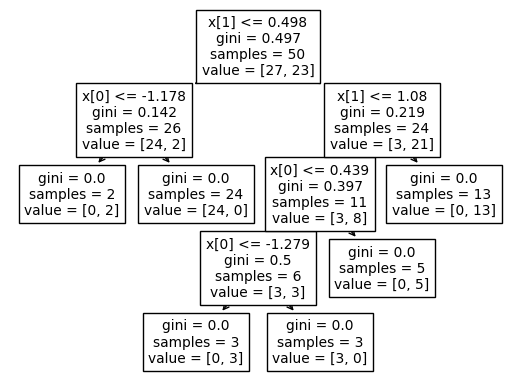

In [16]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.9, 'x[1] <= -0.021\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.5, 0.7, 'x[0] <= -1.581\ngini = 0.18\nsamples = 30\nvalue = [3, 27]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'x[1] <= 0.366\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.5, 0.3, 'x[1] <= 0.345\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

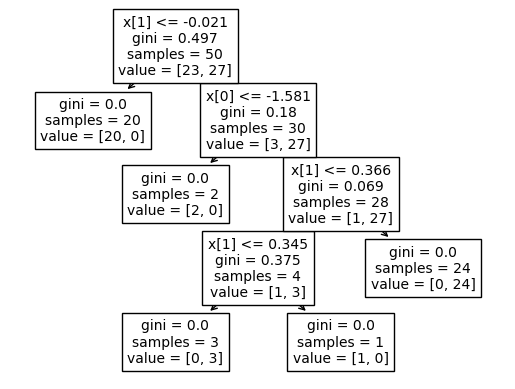

In [17]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[0] <= 0.916\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.4, 0.625, 'x[0] <= -0.373\ngini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.6, 0.375, 'x[1] <= -1.276\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]')]

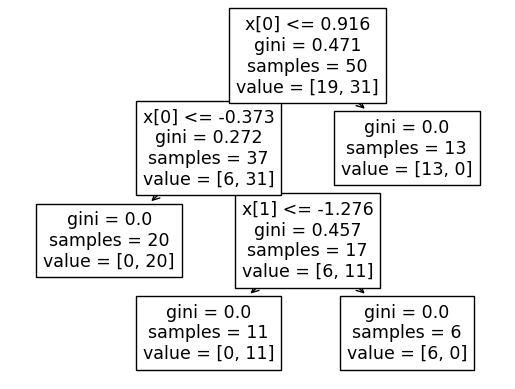

In [18]:
plot_tree(clf3)

In [19]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([0])

In [20]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([0])

In [21]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [22]:
df.sample(14, replace=True)

,col1,col2,col3,col4,col5,target
92,0.689522,-1.798347,-3.203995,0.710507,3.081517,1
68,-3.140304,-1.183822,1.109253,2.912950,0.597985,0
7,0.862395,-1.753570,-3.358851,0.962747,2.927093,1
42,-3.144065,1.835609,-0.249163,-0.185247,-1.069047,0
68,-3.140304,-1.183822,1.109253,2.912950,0.597985,0
69,0.680448,-3.035266,-3.671024,0.902693,1.365104,1
80,1.299974,-1.765765,-1.908592,-0.235650,-0.271314,1
86,-2.827420,0.399889,-0.077461,1.057577,0.518446,0
89,-1.301057,1.309294,-0.263490,0.344597,0.525310,0
7,0.862395,-1.753570,-3.358851,0.962747,2.927093,1
